# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#pip install scikit-learn

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
from scipy import stats


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&appid=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Metric&appid=174454d678024800a70a740759768eac


In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&appid=" + weather_api_key
print(url)
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

https://api.openweathermap.org/data/2.5/weather?units=Metric&appid=174454d678024800a70a740759768eac
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tevragh zeina
City not found. Skipping...
Processing Record 2 of Set 1 | kapuskasing
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | chibougamau
Processing Record 5 of Set 1 | kenai
Processing Record 6 of Set 1 | tobelo
Processing Record 7 of Set 1 | la ronge
Processing Record 8 of Set 1 | weno
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | piton saint-leu
Processing Record 12 of Set 1 | abuja
Processing Record 13 of Set 1 | shanghai
Processing Record 14 of Set 1 | vilyuchinsk
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | coquimbo
Processing Record 18 of Set 1 | urangan
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Se

Processing Record 38 of Set 4 | punta arenas
Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | sorong
Processing Record 41 of Set 4 | flin flon
Processing Record 42 of Set 4 | anadyr
Processing Record 43 of Set 4 | rawson
Processing Record 44 of Set 4 | winkler
Processing Record 45 of Set 4 | taoudenni
Processing Record 46 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 47 of Set 4 | constantia
Processing Record 48 of Set 4 | naze
Processing Record 49 of Set 4 | saint-philippe
Processing Record 0 of Set 5 | macau
Processing Record 1 of Set 5 | nantucket
Processing Record 2 of Set 5 | garachico
Processing Record 3 of Set 5 | burunday
Processing Record 4 of Set 5 | grand falls-windsor
Processing Record 5 of Set 5 | colonia
Processing Record 6 of Set 5 | lompoc
Processing Record 7 of Set 5 | xinyuan
Processing Record 8 of Set 5 | kailua-kona
Processing Record 9 of Set 5 | mount isa
Processing Record 10 of Set 5 | kidal
Processing Record 11 o

Processing Record 30 of Set 8 | marshfield
Processing Record 31 of Set 8 | kavieng
Processing Record 32 of Set 8 | sinabang
Processing Record 33 of Set 8 | san francisco
Processing Record 34 of Set 8 | naja' hammadi
Processing Record 35 of Set 8 | veinticinco de mayo
Processing Record 36 of Set 8 | rampur
Processing Record 37 of Set 8 | afif
Processing Record 38 of Set 8 | callao
Processing Record 39 of Set 8 | mount pleasant
Processing Record 40 of Set 8 | as sulayyil
Processing Record 41 of Set 8 | huarmey
Processing Record 42 of Set 8 | okakarara
Processing Record 43 of Set 8 | igarka
Processing Record 44 of Set 8 | yangor
City not found. Skipping...
Processing Record 45 of Set 8 | keflavik
Processing Record 46 of Set 8 | acapulco de juarez
Processing Record 47 of Set 8 | paradip garh
Processing Record 48 of Set 8 | ayer hangat
City not found. Skipping...
Processing Record 49 of Set 8 | port alfred
Processing Record 0 of Set 9 | migne
Processing Record 1 of Set 9 | constitucion
Proc

City not found. Skipping...
Processing Record 19 of Set 12 | gornopravdinsk
Processing Record 20 of Set 12 | nguigmi
Processing Record 21 of Set 12 | katabu
Processing Record 22 of Set 12 | alaghsas
Processing Record 23 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 24 of Set 12 | oliver
Processing Record 25 of Set 12 | montfort-sur-meu
Processing Record 26 of Set 12 | xinqing
Processing Record 27 of Set 12 | sitka
Processing Record 28 of Set 12 | kitimat
Processing Record 29 of Set 12 | santa maria de jetiba
City not found. Skipping...
Processing Record 30 of Set 12 | aripuana
Processing Record 31 of Set 12 | sile
Processing Record 32 of Set 12 | phuthaditjhaba
Processing Record 33 of Set 12 | conception bay south
Processing Record 34 of Set 12 | garoua
Processing Record 35 of Set 12 | maxixe
Processing Record 36 of Set 12 | gorontalo
Processing Record 37 of Set 12 | taulaga
Processing Record 38 of Set 12 | veymandoo
City not found. Skipping...
Processing Reco

In [6]:
city_data

[{'City': 'kapuskasing',
  'Lat': 49.4169,
  'Lng': -82.4331,
  'Max Temp': 23.05,
  'Humidity': 56,
  'Cloudiness': 75,
  'Wind Speed': 5.14,
  'Country': 'CA',
  'Date': 1691617617},
 {'City': 'bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': 29.79,
  'Humidity': 52,
  'Cloudiness': 0,
  'Wind Speed': 4.12,
  'Country': 'US',
  'Date': 1691617431},
 {'City': 'chibougamau',
  'Lat': 49.9168,
  'Lng': -74.3659,
  'Max Temp': 23.79,
  'Humidity': 43,
  'Cloudiness': 20,
  'Wind Speed': 4.63,
  'Country': 'CA',
  'Date': 1691617617},
 {'City': 'kenai',
  'Lat': 60.5544,
  'Lng': -151.2583,
  'Max Temp': 15.08,
  'Humidity': 92,
  'Cloudiness': 100,
  'Wind Speed': 4.12,
  'Country': 'US',
  'Date': 1691617618},
 {'City': 'tobelo',
  'Lat': 1.7284,
  'Lng': 128.0095,
  'Max Temp': 25.64,
  'Humidity': 83,
  'Cloudiness': 91,
  'Wind Speed': 3.55,
  'Country': 'ID',
  'Date': 1691617618},
 {'City': 'la ronge',
  'Lat': 55.1001,
  'Lng': -105.2842,
  'Max Temp': 21.12,
  'Humidity

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapuskasing,49.4169,-82.4331,23.05,56,75,5.14,CA,1691617617
1,bethel,41.3712,-73.4140,29.79,52,0,4.12,US,1691617431
2,chibougamau,49.9168,-74.3659,23.79,43,20,4.63,CA,1691617617
3,kenai,60.5544,-151.2583,15.08,92,100,4.12,US,1691617618
4,tobelo,1.7284,128.0095,25.64,83,91,3.55,ID,1691617618


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,23.05,56,75,5.14,CA,1691617617
1,bethel,41.3712,-73.4140,29.79,52,0,4.12,US,1691617431
2,chibougamau,49.9168,-74.3659,23.79,43,20,4.63,CA,1691617617
3,kenai,60.5544,-151.2583,15.08,92,100,4.12,US,1691617618
4,tobelo,1.7284,128.0095,25.64,83,91,3.55,ID,1691617618


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

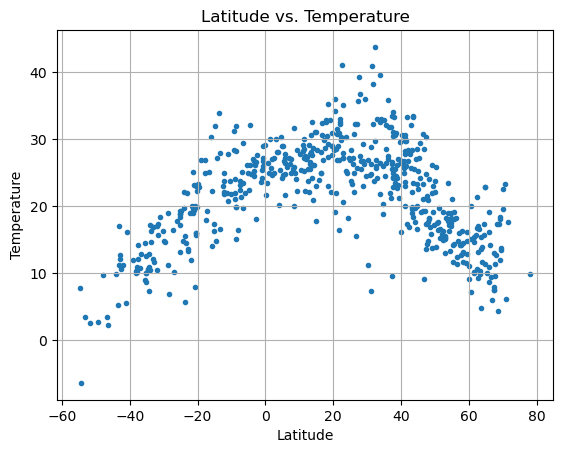

In [11]:
# Build scatter plot for latitude vs. temperature
xValues = city_data_df["Lat"]
yValues = city_data_df["Max Temp"]

plt.scatter(xValues, yValues, marker=".")
#plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker=".")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

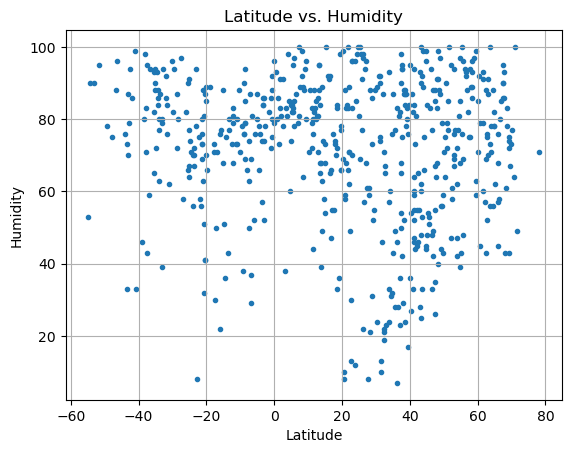

In [12]:
# Build the scatter plots for latitude vs. humidity
xValues = city_data_df["Lat"]
yValues = city_data_df["Humidity"]

plt.scatter(xValues, yValues, marker=".")
#plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker=".")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

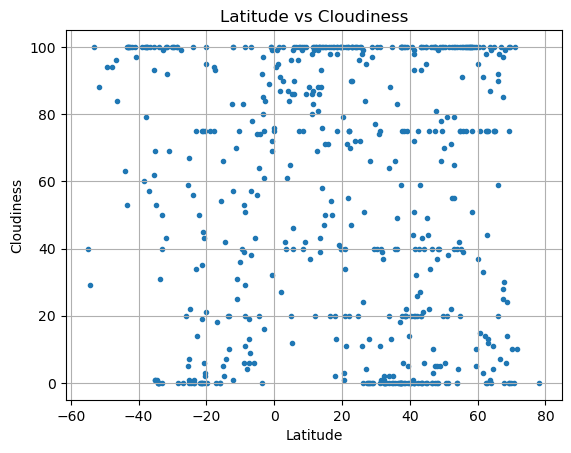

In [13]:
# Build the scatter plots for latitude vs. cloudiness
xValues = city_data_df["Lat"]
yValues = city_data_df["Cloudiness"]

plt.scatter(xValues, yValues, marker=".")
#plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

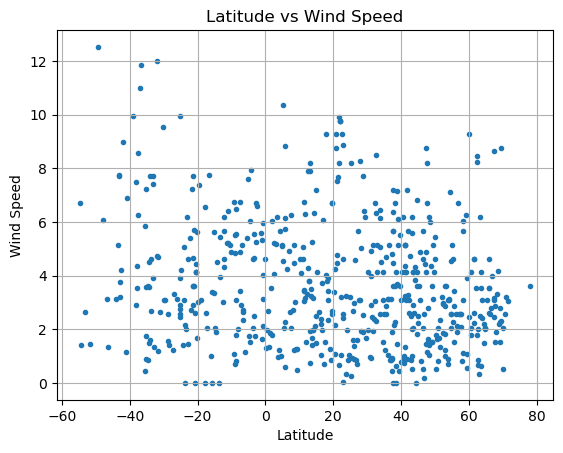

In [14]:
# Build the scatter plots for latitude vs. wind speed
xValues = city_data_df["Lat"]
yValues = city_data_df["Wind Speed"]

plt.scatter(xValues, yValues, marker=".")
#plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = ".")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [93]:
# Define a function to create Linear Regression plots
def linearRegressionFunction(xValues, yValues, y_label, title, text_position):
    
    #run regression on northern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xValues, yValues)
   # result = stats.linregress(xValues, yValues)
    regressValues = xValues * slope + intercept
    lineEq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    


    
    # Plot
    plt.scatter(xValues, yValues)
    plt.plot(xValues, regressValues,"r-")
    plt.annotate(lineEq, text_position, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {rvalue**2}.")
    plt.grid(True)
    plt.show()
 #   pass

In [94]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)


northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,23.05,56,75,5.14,CA,1691617617
1,bethel,41.3712,-73.4140,29.79,52,0,4.12,US,1691617431
2,chibougamau,49.9168,-74.3659,23.79,43,20,4.63,CA,1691617617
3,kenai,60.5544,-151.2583,15.08,92,100,4.12,US,1691617618
4,tobelo,1.7284,128.0095,25.64,83,91,3.55,ID,1691617618


In [95]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,papatowai,-46.5619,169.4708,3.38,88,96,3.14,NZ,1691617619
9,piton saint-leu,-21.2196,55.3151,19.04,73,0,3.60,RE,1691617620
14,margaret river,-33.9500,115.0667,10.43,80,100,1.59,AU,1691617493
15,coquimbo,-29.9533,-71.3436,14.85,82,100,3.09,CL,1691617572
16,urangan,-25.3000,152.9000,17.20,66,59,2.56,AU,1691617622


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.42029059745148045.


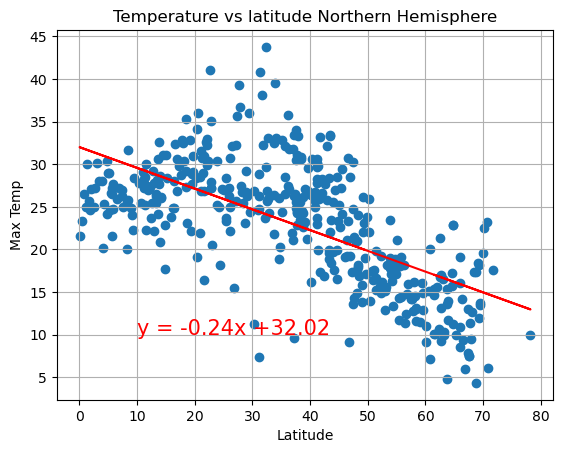

In [104]:
# Assuming you have northern_hemi_df defined somewhere
xValues = northern_hemi_df["Lat"]
yValues = northern_hemi_df["Max Temp"]

# Call the plot_linear_regression function
#plot_linear_regression(x_values, y_values, y_label, title, text_position)
linearRegressionFunction(xValues, yValues, "Max Temp", "Temperature vs latitude Northern Hemisphere", (10,10))

The r-value is: 0.6882840248375574.


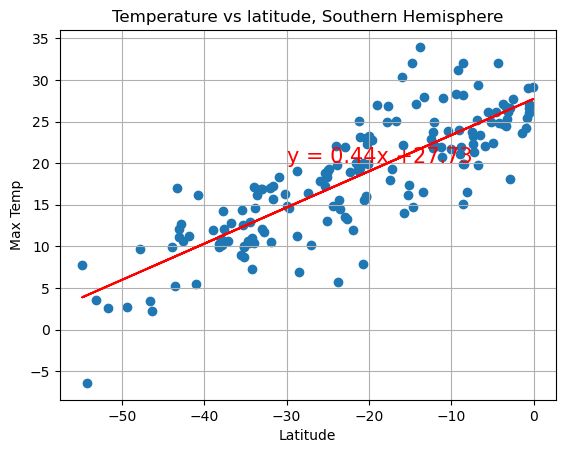

In [105]:
# Linear regression on Southern Hemisphere
xValues = southern_hemi_df["Lat"]
yValues = southern_hemi_df["Max Temp"]

linearRegressionFunction(xValues, yValues, "Max Temp", "Temperature vs latitude, Southern Hemisphere", (-30,20))

**Discussion about the linear relationship:** The southern hemipshere's temperature goes in the opposite direction across the latitude in comparisoin to the norhtern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0031998877724399486.


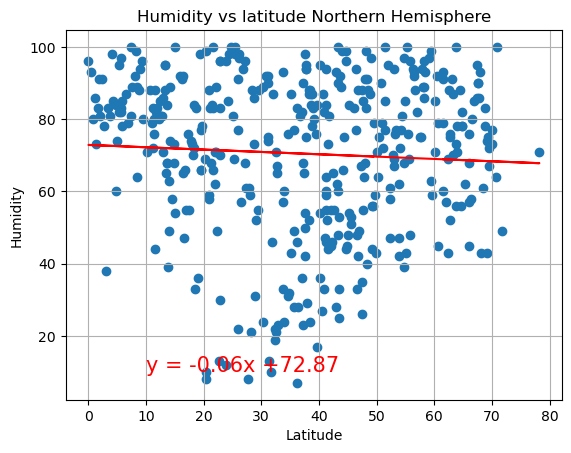

In [111]:
# Northern Hemisphere
xValues = northern_hemi_df["Lat"]
yValues = northern_hemi_df["Humidity"]

# Call the plot_linear_regression function

linearRegressionFunction(xValues, yValues, "Humidity", "Humidity vs latitude Northern Hemisphere", (10,10))

The r-value is: 0.017294715619456943.


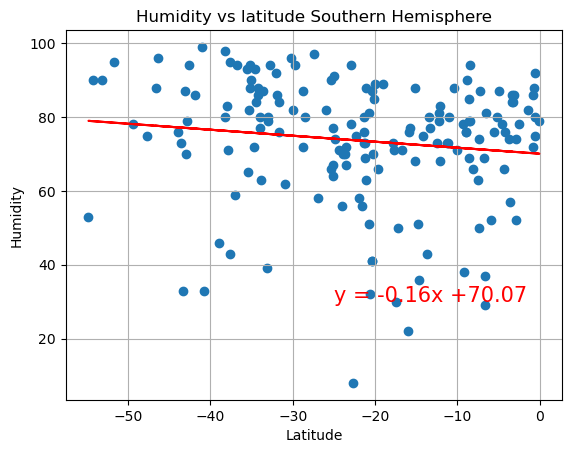

In [112]:
# Southern Hemisphere
xValues = southern_hemi_df["Lat"]
yValues = southern_hemi_df["Humidity"]

# Call the plot_linear_regression function

linearRegressionFunction(xValues, yValues, "Humidity", "Humidity vs latitude Southern Hemisphere", (-25,30))

**Discussion about the linear relationship:** Despite there being a higher spread of humidity in the northern hemisphere, the linear regression is very similar for both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04144899521635827.


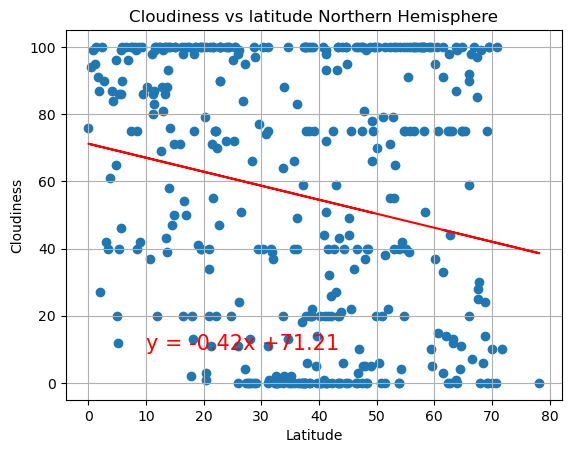

In [118]:
# Northern Hemisphere
xValues = northern_hemi_df["Lat"]
yValues = northern_hemi_df["Cloudiness"]

# Call the plot_linear_regression function

linearRegressionFunction(xValues, yValues, "Cloudiness", "Cloudiness vs latitude Northern Hemisphere", (10,10))

The r-value is: 0.03340276107869831.


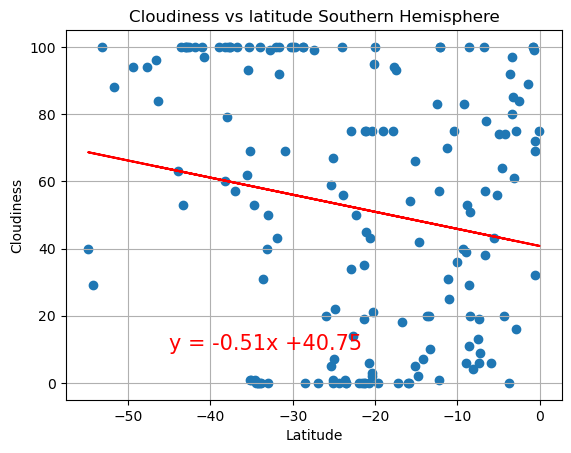

In [119]:
# Southern Hemisphere

xValues = southern_hemi_df["Lat"]
yValues = southern_hemi_df["Cloudiness"]

# Call the plot_linear_regression function

linearRegressionFunction(xValues, yValues, "Cloudiness", "Cloudiness vs latitude Southern Hemisphere", (-45,10))

**Discussion about the linear relationship:** Despite there being a larger spread of cloudiness across various latitudes across the northern hempisphere, the linear regression is almost the same in terms of position and angling across both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.016892910449727808.


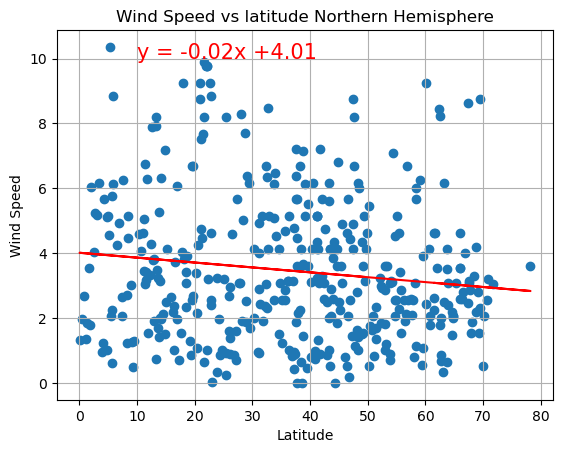

In [116]:
# Northern Hemisphere
xValues = northern_hemi_df["Lat"]
yValues = northern_hemi_df["Wind Speed"]

# Call the plot_linear_regression function

linearRegressionFunction(xValues, yValues, "Wind Speed", "Wind Speed vs latitude Northern Hemisphere", (10,10))

The r-value is: 0.013132636618949445.


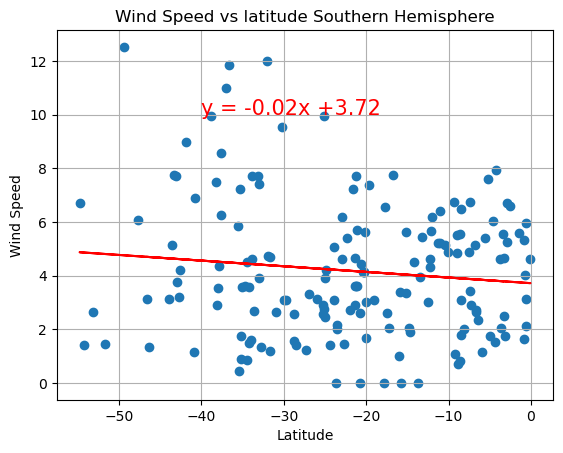

In [117]:
# Southern Hemisphere
xValues = southern_hemi_df["Lat"]
yValues = southern_hemi_df["Wind Speed"]

# Call the plot_linear_regression function

linearRegressionFunction(xValues, yValues, "Wind Speed", "Wind Speed vs latitude Southern Hemisphere", (-40,10))

**Discussion about the linear relationship:** Despite there being a larger spread of windiness across the northern hemisphere's latitudes points, the linear regression is almost the same in terms of position and angling across both hemispheres.